In [1]:
import os
os.chdir(r'/Users/ryanmccrickerd/gdrive/rypy')

In [19]:
import numpy as np
import pandas as pd
import rypy as rp
from matplotlib import pyplot as plt
from scipy.stats import norm
import mpl
# %matplotlib inline

In [20]:
nx = np.newaxis
mpl.config(scale=1.5,print_keys=False)

In [21]:
σ,ρ,v,κ = 0.1,-0.,1,256/2**1
θ = σ,ρ,v,κ

In [22]:
T = np.array([1/52,2/52,1/12,1/4,1/2,1])[:,nx]
M = ['1W','2W','1M','3M','6M','1Y']
Δ = np.linspace(1,99,21)[nx,:]/100
k = (norm.ppf(Δ)*σ*np.sqrt(T))

In [33]:
pd.DataFrame(k,index=M,columns=Δ[0,:])

,0.01,0.059000000000000004,0.10800000000000001,0.157,0.20600000000000002,0.255,0.30400000000000005,0.35300000000000004,0.402,0.451,...,0.549,0.5980000000000001,0.647,0.6960000000000001,0.745,0.794,0.8430000000000001,0.892,0.9410000000000001,0.99
1W,-0.032261,-0.021678,-0.017157,-0.013963,-0.011377,-0.009136,-0.007113,-0.005231,-0.003442,-0.001708,...,0.001708,0.003442,0.005231,0.007113,0.009136,0.011377,0.013963,0.017157,0.021678,0.032261
2W,-0.045623,-0.030657,-0.024264,-0.019746,-0.016089,-0.012921,-0.010059,-0.007398,-0.004867,-0.002415,...,0.002415,0.004867,0.007398,0.010059,0.012921,0.016089,0.019746,0.024264,0.030657,0.045623
1M,-0.067156,-0.045126,-0.035716,-0.029066,-0.023682,-0.019019,-0.014807,-0.010890,-0.007164,-0.003555,...,0.003555,0.007164,0.010890,0.014807,0.019019,0.023682,0.029066,0.035716,0.045126,0.067156
3M,-0.116317,-0.078161,-0.061862,-0.050343,-0.041019,-0.032942,-0.025647,-0.018862,-0.012409,-0.006157,...,0.006157,0.012409,0.018862,0.025647,0.032942,0.041019,0.050343,0.061862,0.078161,0.116317
6M,-0.164498,-0.110537,-0.087486,-0.071196,-0.058010,-0.046587,-0.036270,-0.026674,-0.017549,-0.008707,...,0.008707,0.017549,0.026674,0.036270,0.046587,0.058010,0.071196,0.087486,0.110537,0.164498
1Y,-0.232635,-0.156322,-0.123723,-0.100686,-0.082038,-0.065884,-0.051293,-0.037723,-0.024817,-0.012314,...,0.012314,0.024817,0.037723,0.051293,0.065884,0.082038,0.100686,0.123723,0.156322,0.232635


In [24]:
C = rp.pricer(T,k,θ)

In [25]:
BSV = rp.surface(T,k,C)

In [26]:
pd.DataFrame(BSV,index=M,columns=Δ[0,:])

,0.01,0.059000000000000004,0.10800000000000001,0.157,0.20600000000000002,0.255,0.30400000000000005,0.35300000000000004,0.402,0.451,...,0.549,0.5980000000000001,0.647,0.6960000000000001,0.745,0.794,0.8430000000000001,0.892,0.9410000000000001,0.99
1W,0.142272,0.114765,0.102119,0.092793,0.084994,0.078072,0.071735,0.065890,0.060655,0.056565,...,0.056565,0.060655,0.065890,0.071735,0.078072,0.084994,0.092793,0.102119,0.114765,0.142272
2W,0.141323,0.115084,0.103050,0.094206,0.086846,0.080360,0.074488,0.069168,0.064544,0.061100,...,0.061100,0.064544,0.069168,0.074488,0.080360,0.086846,0.094206,0.103050,0.115084,0.141323
1M,0.139199,0.115245,0.104318,0.096347,0.089784,0.084086,0.079042,0.074622,0.070969,0.068432,...,0.068432,0.070969,0.074622,0.079042,0.084086,0.089784,0.096347,0.104318,0.115245,0.139199
3M,0.132843,0.113525,0.104902,0.098764,0.093861,0.089771,0.086335,0.083522,0.081387,0.080034,...,0.080034,0.081387,0.083522,0.086335,0.089771,0.093861,0.098764,0.104902,0.113525,0.132843
6M,0.127013,0.111174,0.104308,0.099555,0.095877,0.092918,0.090532,0.088665,0.087312,0.086488,...,0.086488,0.087312,0.088665,0.090532,0.092918,0.095877,0.099555,0.104308,0.111174,0.127013
1Y,0.120560,0.108331,0.103267,0.099894,0.097383,0.095440,0.093935,0.092801,0.092006,0.091533,...,0.091533,0.092006,0.092801,0.093935,0.095440,0.097383,0.099894,0.103267,0.108331,0.120560


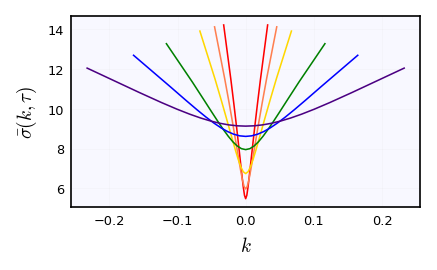

In [27]:
plot,axes = plt.subplots()
for i in range(len(T[:,0])):
    axes.plot(k[i,:],100*BSV[i,:])
    axes.set_xlabel(r'$k$')
    axes.set_ylabel(r'$\bar{\sigma}(k,\tau)$')

In [28]:
bsvt = BSV*np.sqrt(T)
Nd1 = norm.cdf(- k/bsvt - bsvt)
Nd2 = norm.cdf(- k/bsvt + bsvt)

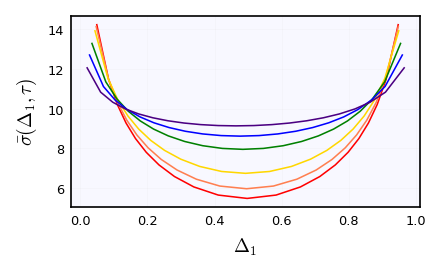

In [29]:
plot,axes = plt.subplots()
for i in range(len(T[:,0])):
    axes.plot(Nd1[i,:],100*BSV[i,:])
    axes.set_xlabel(r'$\Delta_1$')
    axes.set_ylabel(r'$\bar{\sigma}(\Delta_1,\tau)$')

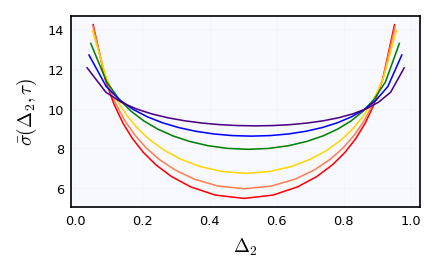

In [30]:
plot,axes = plt.subplots()
for i in range(len(T[:,0])):
    axes.plot(Nd2[i,:],100*BSV[i,:])
    axes.set_xlabel(r'$\Delta_2$')
    axes.set_ylabel(r'$\bar{\sigma}(\Delta_2,\tau)$')